In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
%config IPCompleter.greedy=True

file_path = 'resources/forwards.csv'
forwards_df = pd.read_csv(file_path)
forwards_df['rating'] = (forwards_df['potential'].astype(int) + forwards_df['overall'].astype(int))/2
forwards_df['rating'] = forwards_df['rating'].apply(np.int64)




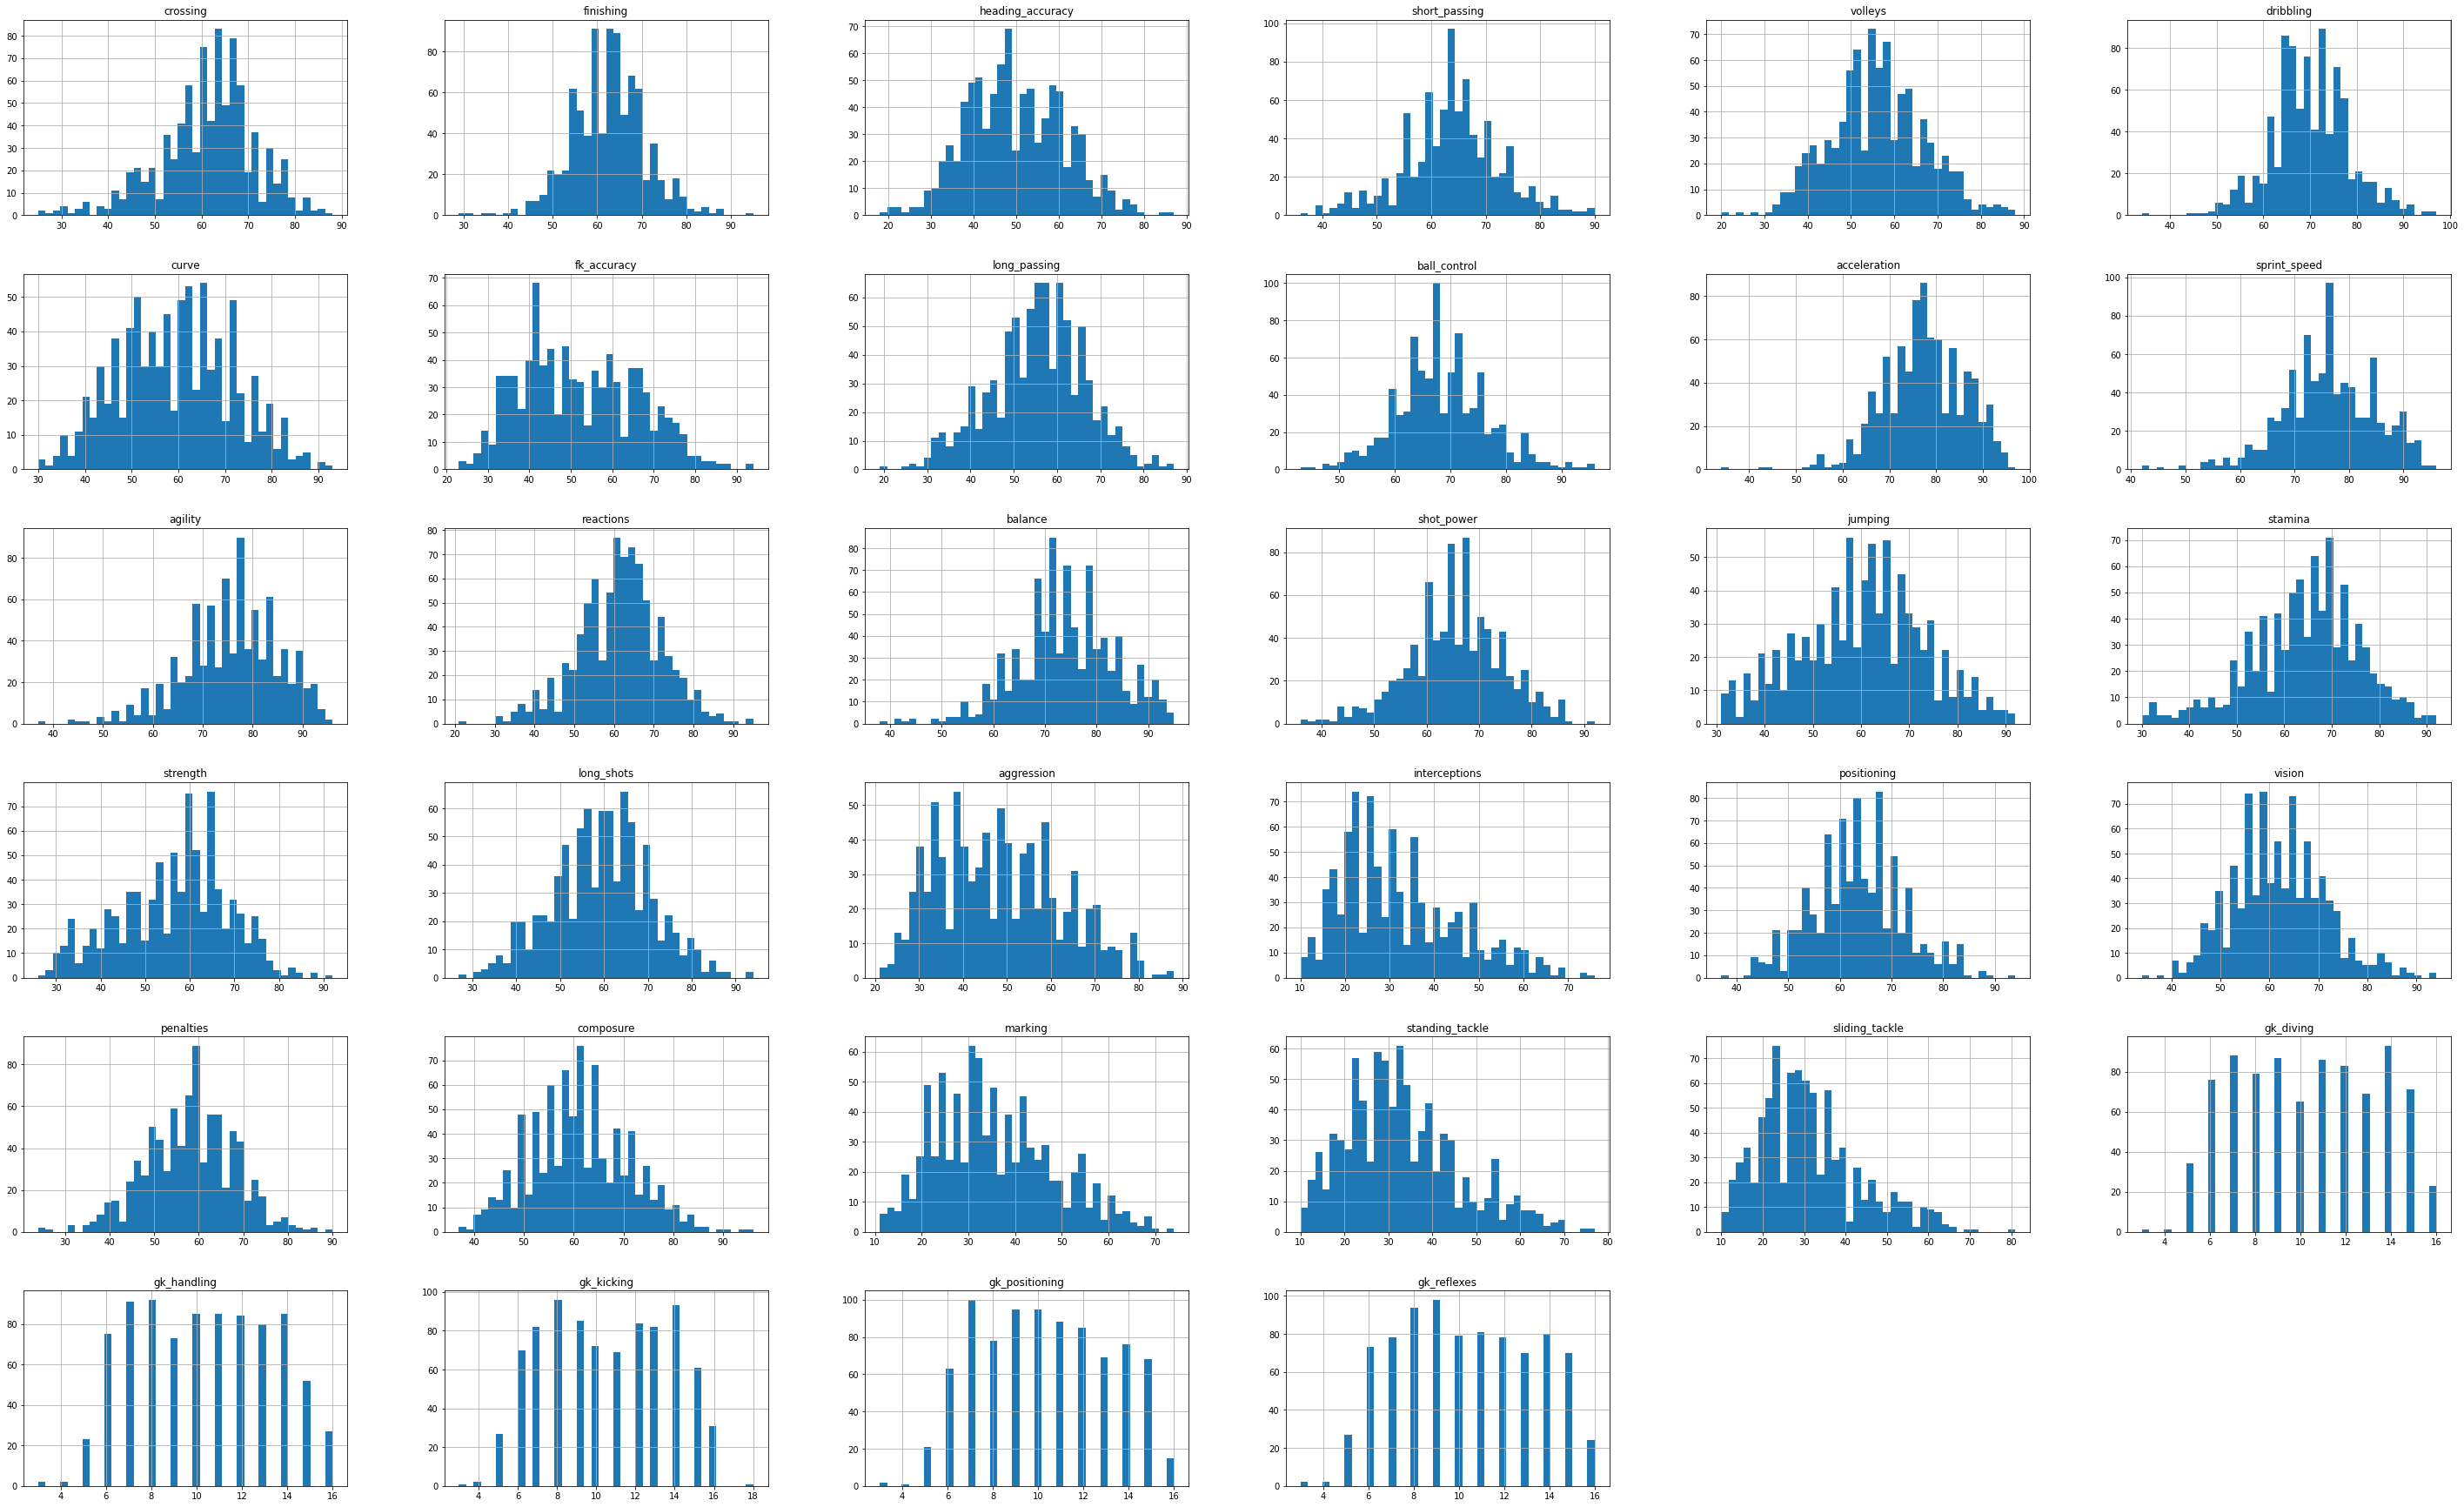

In [3]:
forwards_df.drop(['rating', 'weight', 'overall', 'potential'], axis = 1).hist(bins=40, figsize=(50,31))
plt.show()

In [4]:
forwards_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   overall           856 non-null    int64 
 1   potential         856 non-null    int64 
 2   field_position    856 non-null    object
 3   height            856 non-null    object
 4   weight            856 non-null    object
 5   crossing          856 non-null    int64 
 6   finishing         856 non-null    int64 
 7   heading_accuracy  856 non-null    int64 
 8   short_passing     856 non-null    int64 
 9   volleys           856 non-null    int64 
 10  dribbling         856 non-null    int64 
 11  curve             856 non-null    int64 
 12  fk_accuracy       856 non-null    int64 
 13  long_passing      856 non-null    int64 
 14  ball_control      856 non-null    int64 
 15  acceleration      856 non-null    int64 
 16  sprint_speed      856 non-null    int64 
 17  agility         

In [5]:
forwards_df.isna().any()

overall             False
potential           False
field_position      False
height              False
weight              False
crossing            False
finishing           False
heading_accuracy    False
short_passing       False
volleys             False
dribbling           False
curve               False
fk_accuracy         False
long_passing        False
ball_control        False
acceleration        False
sprint_speed        False
agility             False
reactions           False
balance             False
shot_power          False
jumping             False
stamina             False
strength            False
long_shots          False
aggression          False
interceptions       False
positioning         False
vision              False
penalties           False
composure           False
marking             False
standing_tackle     False
sliding_tackle      False
gk_diving           False
gk_handling         False
gk_kicking          False
gk_positioning      False
gk_reflexes 

In [6]:
list(forwards_df)

['overall',
 'potential',
 'field_position',
 'height',
 'weight',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'rating']

In [7]:
# Define Columns we will include
columns = ['field_position', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping',
    'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking',
    'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rating']

# Fit columns into df
forwards_df = forwards_df[columns]

#Print df
forwards_df

,field_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,RF,84,95,70,90,86,97,93,94,87,...,96,33,28,26,6,11,15,14,8,94
1,LW,79,87,62,84,84,96,88,87,78,...,94,27,24,33,9,9,15,15,11,92
2,LF,81,84,61,89,80,95,83,79,83,...,91,34,27,22,11,12,6,8,8,91
3,LF,82,84,68,87,88,92,88,88,75,...,84,23,20,20,5,4,4,5,8,91
4,LW,86,77,56,85,74,90,87,77,78,...,83,51,24,22,8,4,14,9,10,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,RW,46,53,43,40,42,52,37,33,30,...,44,31,20,29,13,8,8,12,9,54
852,LW,49,45,33,40,37,49,41,33,31,...,41,27,23,24,6,6,14,14,7,56
853,CF,30,49,46,52,43,46,46,37,41,...,43,12,12,10,12,11,6,13,6,60
854,RW,44,49,36,36,39,53,40,30,31,...,47,20,22,20,15,15,5,10,5,54


In [8]:
#Create train_set and test_set
train_set, test_set = train_test_split(forwards_df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(forwards_df))

target_train = train_set['rating']
train_set = train_set.drop(['rating'], axis = 1)

Length of training data: 684
Length of testing data: 172
Length of total data: 856


In [9]:
for position_value in forwards_df['field_position'].unique():
    
    corr_matrix = forwards_df[forwards_df['field_position'] == position_value].corr()['rating'].to_frame()
    temp_df = corr_matrix['rating'].sort_values(ascending=False)
    
    print(f'********** Current Position: {position_value}: \n ')
    
    print(temp_df)
    
    print('\n')

    print(f'-------------------------------------------------------------')
    
    print('\n')


********** Current Position: RF: 
 
rating              1.000000
ball_control        0.933058
finishing           0.926013
positioning         0.921828
dribbling           0.916810
long_shots          0.910853
short_passing       0.901727
crossing            0.875598
reactions           0.870596
composure           0.832974
vision              0.814252
curve               0.756892
volleys             0.744037
shot_power          0.728074
fk_accuracy         0.713642
long_passing        0.625874
balance             0.608748
penalties           0.564760
acceleration        0.486099
agility             0.446243
sprint_speed        0.375068
heading_accuracy    0.257809
gk_kicking          0.138239
jumping             0.125473
stamina             0.024643
gk_positioning     -0.030065
sliding_tackle     -0.051339
aggression         -0.068060
standing_tackle    -0.084533
interceptions      -0.119794
gk_handling        -0.143163
marking            -0.288822
gk_reflexes        -0.312938
strengt

In [10]:
for position in forwards_df['field_position'].unique(): 
    
    try:
    
        # Subset by position
        temp_df = forwards_df[forwards_df['field_position'] == position]

        # Find correlations
        temp_corr = forwards_df[forwards_df['field_position'] == position].corr()['rating'].to_frame()
        temp_corr = temp_corr[temp_corr['rating'] > 0.5]


        # Keep only columns with correltion above 0.5
        temp_features = list(temp_corr.T)
        temp_model_df = temp_df[temp_features]

        #print(temp_features)
        # Split data into train and test, isolate y (target/dependent variable)
        train_set, test_set = train_test_split(temp_model_df, test_size=0.2, random_state=42)
        target_train = train_set['rating']
        train_set = train_set.drop(['rating'], axis = 1) #, 'potential', 'overall'], axis = 1)
        

        # Fit model
        train_set = sm.add_constant(train_set, prepend=False)

        # Fit and summarize OLS model
        mod = sm.OLS(target_train, train_set)

        res = mod.fit()
        
        features = pd.DataFrame([res.pvalues, res.params]).T
        features.columns = ['P-value', 'Coefficient']
        features = features[features['P-value']<0.05]
        features = features.sort_values(by = 'Coefficient', ascending = False)
    

        print(f' ********* Current Position: {position}: \n ')
        print(f' ********* Significant features in order of impact: {features.index}: \n ')
        print(res.summary())
        print('\n')
        
    except BaseException as e: 
        print(f'WARNING: SKIPPING {position} due to {e}')

 ********* Current Position: RF: 
 
 ********* Significant features in order of impact: Index([], dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 17 Jul 2021   Prob (F-statistic):                nan
Time:                        20:56:01   Log-Likelihood:                 339.49
No. Observations:                  12   AIC:                            -655.0
Df Residuals:                       0   BIC:                            -649.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------

strong multicollinearity or other numerical problems.


 ********* Current Position: CF: 
 
 ********* Significant features in order of impact: Index(['const', 'finishing', 'positioning'], dtype='object'): 
 
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     15.70
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           8.68e-13
Time:                        20:56:01   Log-Likelihood:                -135.33
No. Observations:                  59   AIC:                             302.7
Df Residuals:                      43   BIC:                             335.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
 

C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\alexv\anaconda3\envs\PythonData\lib\site-packages\statsmodels\regressio

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.